In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from datetime import datetime

In [2]:
url = 'https://www.camara.cl/diputados/diputados.aspx#mostrarDiputados'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
# lista de url perfiles
profiles_uls = [x.find('a')['href'] for x in soup.find_all('article',{'class':'grid-2'})]


In [4]:
url.split('/')[3]

'diputados'

In [6]:
# running time: 2 min 40s

rows=[]

for profile in profiles_uls:

    url = 'https://www.camara.cl/diputados/' + profile
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    row={}
    row['Nombre'] = soup.find('h2').text[9:]
    row['Periodos parlamentarios'] = str([x.text for x in soup.find_all('div',{'class':'grid-2 aleft m-left14'})[2].find_all('li')[1:]]).replace('\'','')[1:-1]
    row['Comunas'] =        soup.find_all('p')[2].text.split('\n')[1].split(':')[1].strip()
    row['Distrito'] =       soup.find_all('p')[2].text.split('\n')[2].split(':')[1].strip().replace('Nº ','')
    row['Región'] =         soup.find_all('p')[2].text.split('\n')[3].split(':')[1].strip()
    # row['Período Actual'] = soup.find_all('p')[2].text.split('\n')[4].split(':')[1].strip()
    row['Partido'] =        soup.find_all('p')[2].text.split('\n')[5].split(':')[1].strip()
    row['Bancada'] =        soup.find_all('p')[2].text.split('\n')[6].split(':')[1].strip()
    row['Email'] =          soup.find('i',{'class':'fa fa-envelope-o'}).parent.text.split('\n')[-1].split()[0]
    rows.append(row)


In [7]:
data = pd.DataFrame(rows)

In [10]:
data

,Nombre,Periodos parlamentarios,Comunas,Distrito,Región,Período Actual,Partido,Bancada,Email
0,María Candelaria Acevedo Sáez,2022-2026,"Hualpén, Tomé, Penco, Concepción, Hualqui, Chi...",20,Región del Bío Bío,2022-2026,Partido Comunista,"Comité Comunista, Federación Regionalista Verd...",[email
1,Eric Aedo Jeldres,2022-2026,"Hualpén, Tomé, Penco, Concepción, Hualqui, Chi...",20,Región del Bío Bío,2022-2026,Partido Demócrata Cristiano,Demócrata Cristiano,[email
2,Yovana Ahumada Palma,2022-2026,"Sierra Gorda, San Pedro de Atacama, Antofagast...",3,Región de Antofagasta,2022-2026,Partido de la Gente,Comité Partido de la Gente,[email
3,Jorge Alessandri Vergara,"2018-2022, 2022-2026","Santiago, Providencia, San Joaquín, La Granja,...",10,Región Metropolitana de Santiago,2022-2026,Unión Demócrata Independiente,Unión Demócrata Independiente,[email
4,René Alinco Bustos,"2006-2010, 2010-2014, 2018-2022, 2022-2026","Coyhaique, Aysén, Chile Chico, O'Higgins, Coch...",27,Región de Aysén del General Carlos Ibáñez del ...,2022-2026,Independientes,,[email
...,...,...,...,...,...,...,...,...,...
150,Sebastián Videla Castillo,2022-2026,"Sierra Gorda, San Pedro de Atacama, Antofagast...",3,Región de Antofagasta,2022-2026,Independientes,Comité Radical - Liberal,[email
151,Gastón Von Mühlenbrock Zamora,"2002-2006, 2006-2010, 2010-2014, 2018-2022, 20...","Panguipulli, Los Lagos, Lanco, Futrono, La Uni...",24,Región de Los Ríos,2022-2026,Unión Demócrata Independiente,Unión Demócrata Independiente,[email
152,Flor Weisse Novoa,2022-2026,"Los Ángeles, Alto Biobío, Mulchén, Los Álamos,...",21,Región del Bío Bío,2022-2026,Unión Demócrata Independiente,Unión Demócrata Independiente,[email
153,Gonzalo Winter Etcheberry,"2018-2022, 2022-2026","Santiago, Providencia, San Joaquín, La Granja,...",10,Región Metropolitana de Santiago,2022-2026,Partido Convergencia Social,"Comité Frente Amplio RD, Comunes y Convergenci...",[email


In [ ]:

date = datetime.now().strftime("%d-%m-%Y %H%M%S") # get local time as string

filePath = f"../Diputados - Historical Data/Diputados {date} - Webscrape.csv"

data.to_csv(filePath, index=False) # save to file path

pd.set_option('display.max_rows', 100)

# Data Analysis

In [11]:
# Libraries
import pandas as pd 
import plotly.express as px

In [78]:
search_dir = "../Diputados - Historical Data"
os.chdir(search_dir)
files = filter(os.path.isfile, os.listdir(search_dir))
files = [os.path.join(search_dir, f) for f in files] # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))
data = pd.read_csv(files[0])

data

,Nombre,Periodos parlamentarios,Comunas,Distrito,Región,Período Actual,Partido,Bancada,Email
0,Raúl Soto Mardones,"2018-2022, 2022-2026","Mostazal, Graneros, Requínoa, Rancagua, Quinta...",15,Región del Libertador General Bernardo O' Higgins,2022-2026,NaN,Partido Por la Democracia,raul.soto@congreso.cl
1,Alexis Sepúlveda Soto,"2018-2022, 2022-2026","Sagrada Familia, Hualañé, Curepto, Teno, Talca...",17,Región del Maule,2022-2026,NaN,Comité Radical - Liberal,alexis.sepulveda@congreso.cl
2,Claudia Mix Jiménez,"2018-2022, 2022-2026","Quilicura, Pudahuel, Estación Central, Colina,...",8,Región Metropolitana de Santiago,2022-2026,NaN,"Comité Frente Amplio RD, Comunes y Convergenci...",claudia.mix@congreso.cl
3,María Candelaria Acevedo Sáez,2022-2026,"Hualpén, Tomé, Penco, Concepción, Hualqui, Chi...",20,Región del Bío Bío,2022-2026,NaN,"Comité Comunista, Federación Regionalista Verd...",maria.acevedo@congreso.cl
4,Eric Aedo Jeldres,2022-2026,"Hualpén, Tomé, Penco, Concepción, Hualqui, Chi...",20,Región del Bío Bío,2022-2026,NaN,Demócrata Cristiano,eric.aedo@congreso.cl
...,...,...,...,...,...,...,...,...,...
153,Sebastián Videla Castillo,2022-2026,"Sierra Gorda, San Pedro de Atacama, Antofagast...",3,Región de Antofagasta,2022-2026,NaN,Comité Radical - Liberal,sebastian.videla@congreso.cl
154,Gastón Von Mühlenbrock Zamora,"2002-2006, 2006-2010, 2010-2014, 2018-2022, 20...","Panguipulli, Los Lagos, Lanco, Futrono, La Uni...",24,Región de Los Ríos,2022-2026,NaN,Unión Demócrata Independiente,gaston.vonmuhlenbrock@congreso.cl
155,Flor Weisse Novoa,2022-2026,"Los Ángeles, Alto Biobío, Mulchén, Los Álamos,...",21,Región del Bío Bío,2022-2026,NaN,Unión Demócrata Independiente,flor.weisse@congreso.cl
156,Gonzalo Winter Etcheberry,"2018-2022, 2022-2026","Santiago, Providencia, San Joaquín, La Granja,...",10,Región Metropolitana de Santiago,2022-2026,NaN,"Comité Frente Amplio RD, Comunes y Convergenci...",gonzalo.winter@congreso.cl


In [79]:
# To Do:

# check for double names or double entry in rows
# 'Periodos parlamentarios' divide into multiple columns
# 'Comunas' divide into multiple columns
# 'Distrito' change column type to numeric
# 'Período Actual' drop column
# 'Partido' new column based on 'Bancada'
# 


In [80]:
# check for double names or double entry in rows
# the email should be a unique indicator of the amount of rows
data.Email.nunique() == data.shape[0] # if false, there are duplicates
# run if False:
# data[data.Email.duplicated() == True] # display displicates: no duplicates

False

In [81]:
# 'Periodos parlamentarios' divide into multiple columns

Periodos =['1990-1994','1994-1998','2002-2006','2006-2010','2010-2014','2014-2018','2018-2022','2022-2026']

def StrInList(lst,num):
    if Periodos[num] in lst:
        return Periodos[num]

for idx in range(len(Periodos)):
    data[f'Periodos parlamentarios {Periodos[idx]}'] = data['Periodos parlamentarios'].apply(lambda x: StrInList(x,idx))

data.drop('Periodos parlamentarios',axis=1, inplace=True)

data


,Nombre,Comunas,Distrito,Región,Período Actual,Partido,Bancada,Email,Periodos parlamentarios 1990-1994,Periodos parlamentarios 1994-1998,Periodos parlamentarios 2002-2006,Periodos parlamentarios 2006-2010,Periodos parlamentarios 2010-2014,Periodos parlamentarios 2014-2018,Periodos parlamentarios 2018-2022,Periodos parlamentarios 2022-2026
0,Raúl Soto Mardones,"Mostazal, Graneros, Requínoa, Rancagua, Quinta...",15,Región del Libertador General Bernardo O' Higgins,2022-2026,NaN,Partido Por la Democracia,raul.soto@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026
1,Alexis Sepúlveda Soto,"Sagrada Familia, Hualañé, Curepto, Teno, Talca...",17,Región del Maule,2022-2026,NaN,Comité Radical - Liberal,alexis.sepulveda@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026
2,Claudia Mix Jiménez,"Quilicura, Pudahuel, Estación Central, Colina,...",8,Región Metropolitana de Santiago,2022-2026,NaN,"Comité Frente Amplio RD, Comunes y Convergenci...",claudia.mix@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026
3,María Candelaria Acevedo Sáez,"Hualpén, Tomé, Penco, Concepción, Hualqui, Chi...",20,Región del Bío Bío,2022-2026,NaN,"Comité Comunista, Federación Regionalista Verd...",maria.acevedo@congreso.cl,None,None,None,None,None,None,None,2022-2026
4,Eric Aedo Jeldres,"Hualpén, Tomé, Penco, Concepción, Hualqui, Chi...",20,Región del Bío Bío,2022-2026,NaN,Demócrata Cristiano,eric.aedo@congreso.cl,None,None,None,None,None,None,None,2022-2026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Sebastián Videla Castillo,"Sierra Gorda, San Pedro de Atacama, Antofagast...",3,Región de Antofagasta,2022-2026,NaN,Comité Radical - Liberal,sebastian.videla@congreso.cl,None,None,None,None,None,None,None,2022-2026
154,Gastón Von Mühlenbrock Zamora,"Panguipulli, Los Lagos, Lanco, Futrono, La Uni...",24,Región de Los Ríos,2022-2026,NaN,Unión Demócrata Independiente,gaston.vonmuhlenbrock@congreso.cl,None,None,2002-2006,2006-2010,2010-2014,None,2018-2022,2022-2026
155,Flor Weisse Novoa,"Los Ángeles, Alto Biobío, Mulchén, Los Álamos,...",21,Región del Bío Bío,2022-2026,NaN,Unión Demócrata Independiente,flor.weisse@congreso.cl,None,None,None,None,None,None,None,2022-2026
156,Gonzalo Winter Etcheberry,"Santiago, Providencia, San Joaquín, La Granja,...",10,Región Metropolitana de Santiago,2022-2026,NaN,"Comité Frente Amplio RD, Comunes y Convergenci...",gonzalo.winter@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026


In [82]:
list(set(data.Comunas.to_list())) # this is to see the unique groups in the 'Comunas' column
data[data['Distrito']==11] # this is to test that each District number has the same group of 'Comunas', so there is no need to split the 'Comunas' column


,Nombre,Comunas,Distrito,Región,Período Actual,Partido,Bancada,Email,Periodos parlamentarios 1990-1994,Periodos parlamentarios 1994-1998,Periodos parlamentarios 2002-2006,Periodos parlamentarios 2006-2010,Periodos parlamentarios 2010-2014,Periodos parlamentarios 2014-2018,Periodos parlamentarios 2018-2022,Periodos parlamentarios 2022-2026
9,Cristián Araya Lerdo de Tejada,"Lo Barnechea, La Reina, Peñalolén, Vitacura, L...",11,Región Metropolitana de Santiago,2022-2026,NaN,Comité Republicanos,cristian.araya@congreso.cl,None,None,None,None,None,None,None,2022-2026
45,Gonzalo De la Carrera Correa,"Lo Barnechea, La Reina, Peñalolén, Vitacura, L...",11,Región Metropolitana de Santiago,2022-2026,NaN,Comité Republicanos,gonzalo.delacarrera@congreso.cl,None,None,None,None,None,None,None,2022-2026
47,Catalina Del Real Mihovilovic,"Lo Barnechea, La Reina, Peñalolén, Vitacura, L...",11,Región Metropolitana de Santiago,2022-2026,NaN,Renovación Nacional,catalina.delreal@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026
62,Tomás Hirsch Goldschmidt,"Lo Barnechea, La Reina, Peñalolén, Vitacura, L...",11,Región Metropolitana de Santiago,2022-2026,NaN,"Comité Comunista, Federación Regionalista Verd...",tomas.hirsch@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026
116,Guillermo Ramírez Diez,"Lo Barnechea, La Reina, Peñalolén, Vitacura, L...",11,Región Metropolitana de Santiago,2022-2026,NaN,Unión Demócrata Independiente,guillermo.ramirez@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026
148,Francisco Undurraga Gazitúa,"Lo Barnechea, La Reina, Peñalolén, Vitacura, L...",11,Región Metropolitana de Santiago,2022-2026,NaN,Evolución Política,francisco.undurraga@congreso.cl,None,None,None,None,None,None,2018-2022,2022-2026


In [83]:
# data.Bancada.unique()

Bancada_map = {
    'Comité Comunista, Federación Regionalista Verde Social e Independientes':'Izquierda',
    'Demócrata Cristiano':          'Centro',
    'Comité Partido de la Gente':   'Derecha',
    'Unión Demócrata Independiente':'Derecha',
    'Partido Por la Democracia':    'Izquierda',
    'Comité Republicanos':          'Derecha',
    'Comité Ecologista Verde e Independientes':'Izquierda',
    'Socialista':                   'Izquierda',
    'Renovación Nacional':          'Derecha',
    'Comité Frente Amplio RD, Comunes y Convergencia Social':'Izquierda',
    'Comité Radical - Liberal':     'Izquierda',
    'Evolución Política':           'Izquierda'
}

data.Partido = data.Bancada.map(Bancada_map)

In [84]:
data.Partido.value_counts()

Izquierda    79
Derecha      71
Centro        8
Name: Partido, dtype: int64

In [85]:
a = data.Bancada.value_counts().reset_index()
a['Percentage'] = a.Bancada.apply(lambda x: "{:.0%}".format(x/a.Bancada.sum()))
a

,index,Bancada,Percentage
0,Renovación Nacional,25,16%
1,Unión Demócrata Independiente,23,15%
2,"Comité Frente Amplio RD, Comunes y Convergenci...",21,13%
3,"Comité Comunista, Federación Regionalista Verd...",18,11%
4,Comité Republicanos,15,9%
5,Socialista,13,8%
6,Partido Por la Democracia,10,6%
7,Comité Radical - Liberal,9,6%
8,Demócrata Cristiano,8,5%
9,Comité Partido de la Gente,8,5%


# Explanatory Data Analysis

* How many diputados per District
* How many diputados per Region
* How many diputados per Partido
* How many diputados per Partido per District
* How many diputados per Bancada
* How many diputados per Periodo Parlamentarios

* Correlation between Bancada and [Dstrito,Region] - Scatterplot

In [86]:
# How many diputados per District

data.Distrito = data.Distrito.apply(lambda x: str(x))

fig = px.bar(
    data,
    x='Distrito',
    orientation='v',
    color='Partido',
    color_discrete_map={'Izquierda':'red','Centro':'gold','Derecha':'Blue'},
    width=1200, height=400
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45,)

# newnames = {'R':'Republicans','D':'Democrats'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

In [87]:
data[data.Partido == 'Derecha'].Distrito.value_counts()

23    5
20    5
19    4
8     4
6     4
11    4
17    4
10    3
22    3
21    3
9     3
5     3
24    2
16    2
14    2
18    2
25    2
12    2
13    2
26    2
7     2
3     2
15    2
4     1
2     1
27    1
1     1
Name: Distrito, dtype: int64

In [88]:
data[(data.Partido == 'Derecha')&(data.Distrito == '23')]['Comunas'].iloc[0]

'Freire, Temuco, Pitrufquén, Loncoche, Carahue, Saavedra, Cholchol, Padre Las Casas, Nueva Imperial, Cunco, Pucón, Curarrehue, Toltén, Teodoro Schmidt, Villarrica, Gorbea'

In [89]:
data[(data.Partido == 'Derecha')&(data.Distrito == '20')]['Comunas'].iloc[0]

'Hualpén, Tomé, Penco, Concepción, Hualqui, Chiguayante, Florida, San Pedro de la Paz, Coronel, Santa Juana, Talcahuano'

In [90]:
data.Región.unique()

array(["Región del Libertador General Bernardo O' Higgins",
       'Región del Maule', 'Región Metropolitana de Santiago',
       'Región del Bío Bío', 'Región de Antofagasta',
       'Región de Aysén del General Carlos Ibáñez del Campo',
       'Región de Tarapacá', 'Región de Valparaíso',
       'Región de Los Lagos', 'Región de La Araucanía',
       'Región de Los Ríos',
       'Región de Magallanes y de la Antártica Chilena',
       'Región de Ñuble', 'Región de Coquimbo', 'Región de Atacama',
       'Región de Arica y Parinacota'], dtype=object)

In [96]:
# How many diputados per Región

Region_map = {
    "Región del Libertador General Bernardo O' Higgins":'1',
    'Región del Maule':                 '2',
    'Región Metropolitana de Santiago': '3',
    'Región del Bío Bío':               '4',
    'Región de Antofagasta':            '5',
    'Región de Aysén del General Carlos Ibáñez del Campo': '6',
    'Región de Tarapacá':               '7',
    'Región de Valparaíso':             '8',
    'Región de Los Lagos':              '9',
    'Región de La Araucanía':           '10',
    'Región de Los Ríos':               '11',
    'Región de Magallanes y de la Antártica Chilena': '12',
    'Región de Ñuble':                  '13',
    'Región de Coquimbo':               '14',
    'Región de Atacama':                '15',
    'Región de Arica y Parinacota' :    '16'
}

data['Region_updated'] = data.Región.map(Region_map)

fig = px.bar(
    data,
    x='Region_updated',
    orientation='v',
    color='Partido',
    color_discrete_map={'Izquierda':'red','Centro':'gold','Derecha':'Blue'},
    width=1200, height=400
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45,)

# newnames = {'R':'Republicans','D':'Democrats'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

In [105]:
# Region 10 and 13 are looking goooooood
data[data.Region_updated == '13']['Región'].iloc[0] # Ñuble 
data[data.Region_updated == '13']['Comunas'].iloc[0]

'Pinto, Quillón, San Ignacio, Coihueco, Ninhue, Ránquil, San Nicolás, Bulnes, Yungay, Portezuelo, Ñiquén, El Carmen, San Carlos, Chillán Viejo, Treguaco, Chillán, Pemuco, Quirihue, Cobquecura, Coelemu, San Fabián'

In [100]:
# Region 10 and 13 are looking goooooood
data[data.Region_updated == '10']['Comunas'].iloc[0]

'Freire, Temuco, Pitrufquén, Loncoche, Carahue, Saavedra, Cholchol, Padre Las Casas, Nueva Imperial, Cunco, Pucón, Curarrehue, Toltén, Teodoro Schmidt, Villarrica, Gorbea'

In [101]:
data[data.Region_updated == '15']['Comunas'].iloc[0]

'Vallenar, Alto del Carmen, Chañaral, Diego de Almagro, Copiapó, Caldera, Tierra Amarilla, Freirina, Huasco'

In [103]:
data[data.Region_updated == '4']['Comunas'].iloc[0]

'Hualpén, Tomé, Penco, Concepción, Hualqui, Chiguayante, Florida, San Pedro de la Paz, Coronel, Santa Juana, Talcahuano'

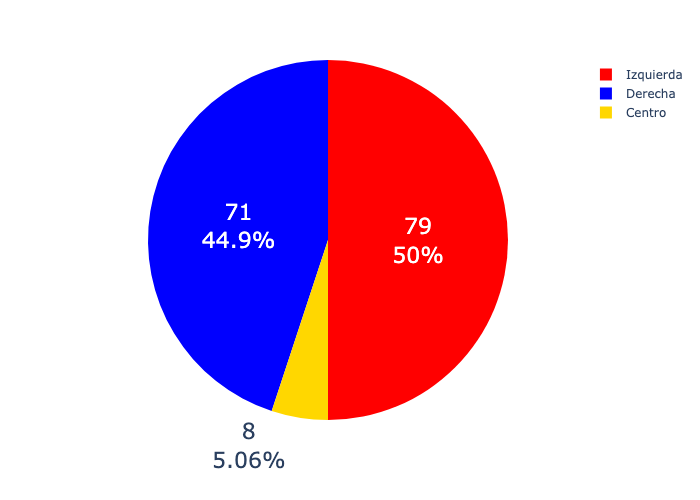

In [108]:
fig = px.pie(
    data,
    names='Partido',
    color='Partido',
    color_discrete_map={'Izquierda':'red','Centro':'gold','Derecha':'Blue'}
)

fig.update_traces(textfont_size=22,textinfo='percent+value')

fig.show("png")